In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# I.1. Centrality Measures

#### Read Graphml File

In [ ]:
#start with the graphml file for London's underground
G = nx.read_graphml('london.graph')

In [ ]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [ ]:
#We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[df['flows']==0] 

,source,target,length,line_name,flows
224,Wandsworth Road,Battersea Park,1168.489261,London Overground,0
398,Kennington,Nine Elms,2030.621843,Northern,0
426,Battersea Power Station,Nine Elms,1073.465362,Northern,0


In [ ]:
# To check edges attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [ ]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

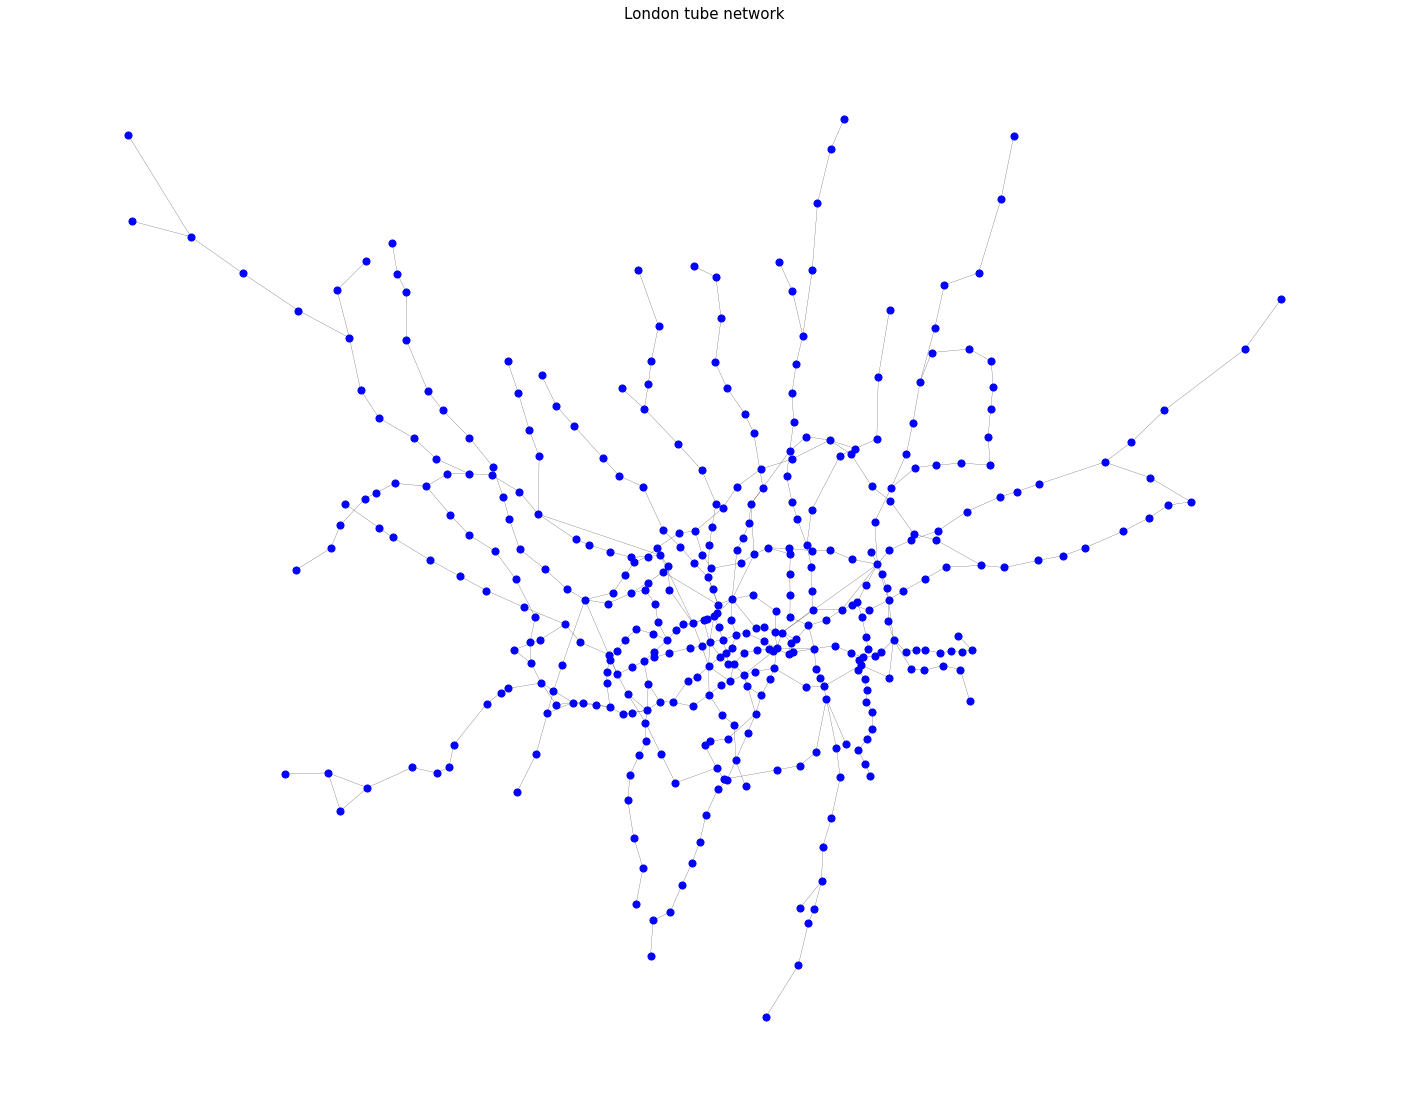

In [ ]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

####Degree Centrality

In [ ]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [ ]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted_degree = df.sort_values(["degree"], ascending=False)
df_sorted_degree[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


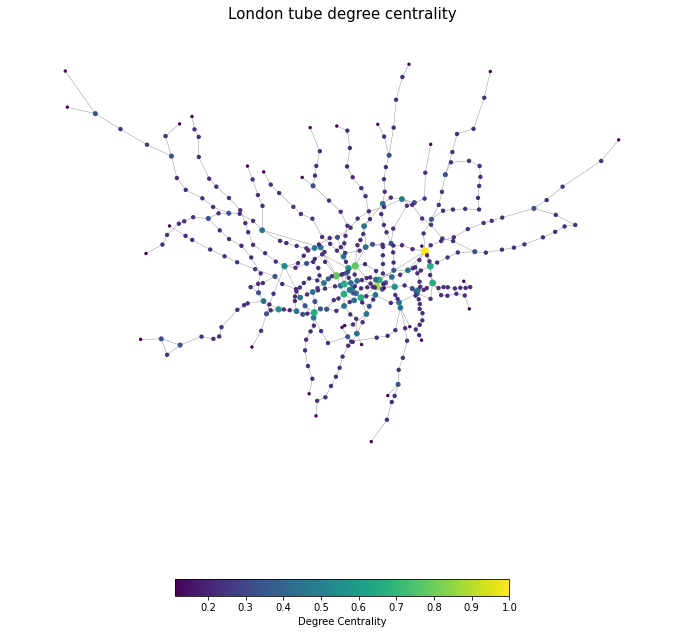

In [ ]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

####Betweenness Centrality

In [ ]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted_between = df.sort_values(["betweenness_t"], ascending=False)

df_sorted_between[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


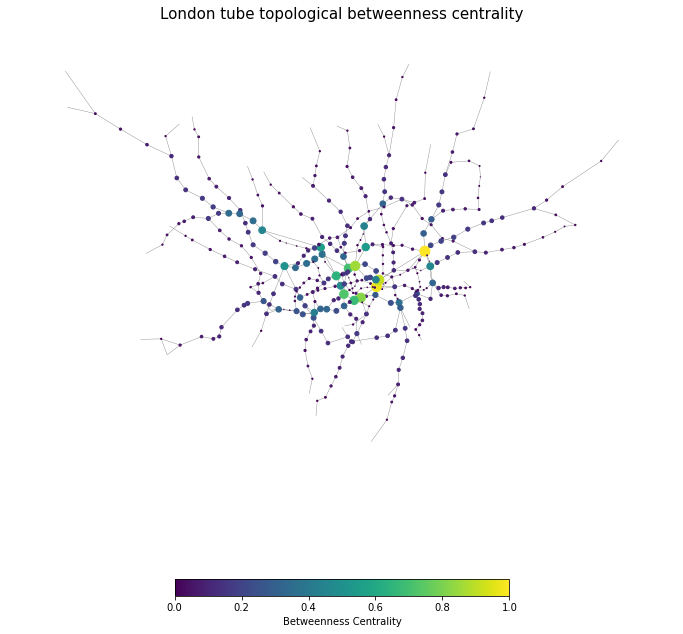

In [ ]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

####Closeness Centrality

In [ ]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted_close = df.sort_values(["closeness_t"], ascending=False)
df_sorted_close[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


In [ ]:
df_sorted_close[::-1]

,closeness_t
Watford Junction,0.042427
Heathrow Terminal 5,0.043155
Watford High Street,0.044302
Heathrow Terminal 4,0.045091
Heathrow Terminals 2 & 3,0.045096
...,...
Waterloo,0.112265
Westminster,0.112549
King's Cross St. Pancras,0.113443
Bank and Monument,0.113572


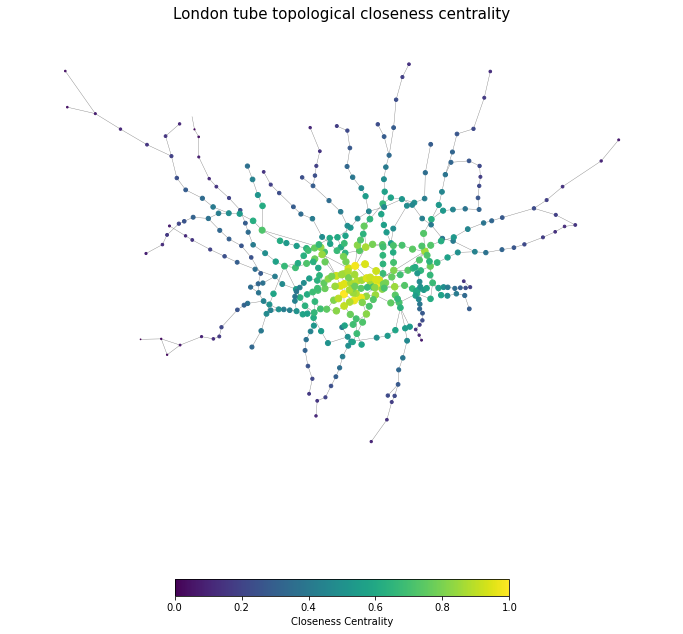

In [ ]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

# I.2. Impact Measures

In [ ]:
# Global Efficiency
print(nx.global_efficiency(G))

0.1012561935972123


In [ ]:
print(nx.local_efficiency(G))

0.030548628428927686


In [ ]:
# To obtain the largest component as a new graph: 
# Get the list of components:
components = nx.connected_components(G)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G.subgraph(largest_component)

print("Largest Component: ", Largest_subgraph.number_of_nodes())

Largest Component:  401


# I.3. Node removal

#### Strategy A

In [ ]:
df_sorted_between[:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


In [ ]:
df_s = df_sorted_between.reset_index()
df_s = df_s.rename(columns={'index': 'station_name'})
df_s[:10]

,station_name,betweenness_t
0,Stratford,23768.093434
1,Bank and Monument,23181.058947
2,Liverpool Street,21610.387049
3,King's Cross St. Pancras,20373.521465
4,Waterloo,19464.882323
5,Green Park,17223.622114
6,Euston,16624.275469
7,Westminster,16226.155916
8,Baker Street,15287.107612
9,Finchley Road,13173.758009


In [ ]:
#To remove nodes and measure the impact
G = nx.read_graphml('london.graph')
G3 = G
print('Betweenness Removal')
for i in range(10):
  #G = nx.read_graphml('london.graph')
  #G3 = G
  orderbet= [df_s['station_name'][i]]
  G3.remove_nodes_from(orderbet)

  # To obtain the largest component as a new graph: 
  # Get the list of components:
  components = nx.connected_components(G3)
  # Use the max() command to find the largest one:
  largest_component = max(components, key=len)
  # Create a "subgraph" of the largest component
  Largest_subgraph = G3.subgraph(largest_component)

  print("Remove the",i,df_s['station_name'][i],": Global Efficiency: ", nx.global_efficiency(G3) , "Largest Component: ", Largest_subgraph.number_of_nodes())

Betweenness Removal
Remove the 0 Stratford : Global Efficiency:  0.08891736066510689 Largest Component:  379
Remove the 1 Bank and Monument : Global Efficiency:  0.08586164448742485 Largest Component:  378
Remove the 2 Liverpool Street : Global Efficiency:  0.08496349266423939 Largest Component:  377
Remove the 3 King's Cross St. Pancras : Global Efficiency:  0.07849775440713821 Largest Component:  371
Remove the 4 Waterloo : Global Efficiency:  0.07594226578366223 Largest Component:  370
Remove the 5 Green Park : Global Efficiency:  0.07415154167648695 Largest Component:  369
Remove the 6 Euston : Global Efficiency:  0.06820564659789057 Largest Component:  346
Remove the 7 Westminster : Global Efficiency:  0.06765950327361094 Largest Component:  345
Remove the 8 Baker Street : Global Efficiency:  0.064700058053009 Largest Component:  342
Remove the 9 Finchley Road : Global Efficiency:  0.06313903700825897 Largest Component:  339


In [ ]:
df_c = df_sorted_close.reset_index()
df_c = df_c.rename(columns={'index': 'station_name'})
df_c[:10]

,station_name,closeness_t
0,Green Park,0.114778
1,Bank and Monument,0.113572
2,King's Cross St. Pancras,0.113443
3,Westminster,0.112549
4,Waterloo,0.112265
5,Oxford Circus,0.111204
6,Bond Street,0.110988
7,Farringdon,0.110742
8,Angel,0.110742
9,Moorgate,0.110314


In [ ]:
#To remove nodes and measure the impact
G = nx.read_graphml('london.graph')
G3 = G
print('Closeness Removal')
for i in range(10):
  #G = nx.read_graphml('london.graph')
  #G3 = G
  orderbet= [df_c['station_name'][i]]
  G3.remove_nodes_from(orderbet)

  # To obtain the largest component as a new graph: 
  # Get the list of components:
  components = nx.connected_components(G3)
  # Use the max() command to find the largest one:
  largest_component = max(components, key=len)
  # Create a "subgraph" of the largest component
  Largest_subgraph = G3.subgraph(largest_component)

  print("Remove the",i,df_c['station_name'][i],": Global Efficiency: ", nx.global_efficiency(G3) , "Largest Component: ", Largest_subgraph.number_of_nodes())

Closeness Removal
Remove the 0 Green Park : Global Efficiency:  0.09918991960788402 Largest Component:  400
Remove the 1 Bank and Monument : Global Efficiency:  0.09487232544791133 Largest Component:  399
Remove the 2 King's Cross St. Pancras : Global Efficiency:  0.08793385149140875 Largest Component:  398
Remove the 3 Westminster : Global Efficiency:  0.08737164566976727 Largest Component:  397
Remove the 4 Waterloo : Global Efficiency:  0.08485943799789313 Largest Component:  396
Remove the 5 Oxford Circus : Global Efficiency:  0.08278135073141742 Largest Component:  395
Remove the 6 Bond Street : Global Efficiency:  0.08258086417012774 Largest Component:  394
Remove the 7 Farringdon : Global Efficiency:  0.08260040537396239 Largest Component:  393
Remove the 8 Angel : Global Efficiency:  0.08262233108950982 Largest Component:  392
Remove the 9 Moorgate : Global Efficiency:  0.08166991436767818 Largest Component:  389


In [ ]:
df_d = df_sorted_degree.reset_index()
df_d = df_d.rename(columns={'index': 'station_name'})
df_d[:10]

,station_name,degree
0,Stratford,0.0225
1,Bank and Monument,0.0200
2,King's Cross St. Pancras,0.0175
3,Baker Street,0.0175
4,Earl's Court,0.0150
5,Oxford Circus,0.0150
6,Liverpool Street,0.0150
7,Waterloo,0.0150
8,Green Park,0.0150
9,Canning Town,0.0150


In [ ]:
#To remove nodes and measure the impact
G = nx.read_graphml('london.graph')
G3 = G
print('Degree Removal')
for i in range(10):
  #G = nx.read_graphml('london.graph')
  #G3 = G
  orderbet= [df_d['station_name'][i]]
  G3.remove_nodes_from(orderbet)

  # To obtain the largest component as a new graph: 
  # Get the list of components:
  components = nx.connected_components(G3)
  # Use the max() command to find the largest one:
  largest_component = max(components, key=len)
  # Create a "subgraph" of the largest component
  Largest_subgraph = G3.subgraph(largest_component)

  print("Remove the",i,df_d['station_name'][i],": Global Efficiency: ", nx.global_efficiency(G3) , "Largest Component: ", Largest_subgraph.number_of_nodes())

Degree Removal
Remove the 0 Stratford : Global Efficiency:  0.08891736066510689 Largest Component:  379
Remove the 1 Bank and Monument : Global Efficiency:  0.08586164448742485 Largest Component:  378
Remove the 2 King's Cross St. Pancras : Global Efficiency:  0.08028700838265396 Largest Component:  377
Remove the 3 Baker Street : Global Efficiency:  0.07570039409751211 Largest Component:  374
Remove the 4 Earl's Court : Global Efficiency:  0.0740361229198828 Largest Component:  373
Remove the 5 Oxford Circus : Global Efficiency:  0.07274535237569829 Largest Component:  371
Remove the 6 Liverpool Street : Global Efficiency:  0.07094844226118287 Largest Component:  365
Remove the 7 Waterloo : Global Efficiency:  0.06898194318071488 Largest Component:  364
Remove the 8 Green Park : Global Efficiency:  0.06825731584971681 Largest Component:  363
Remove the 9 Canning Town : Global Efficiency:  0.06338447666647608 Largest Component:  349


#### Strategy B

In [ ]:
G = nx.read_graphml('london.graph')
G2=G

#topological closeness centrality
clos_t=nx.closeness_centrality(G2)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G2,clos_t,'closeness_t')
clos_t_val=[(i[1]['closeness_t']) for i in G2.nodes(data=True)]

print('Closeness Removal')
for x in range(10):

  maxbet=[n for n in G2.nodes() if G2.nodes[n]['closeness_t'] == max(clos_t_val)]
  G2.remove_nodes_from(maxbet)

  #topological closeness centrality
  clos_t=nx.closeness_centrality(G2)
  # We can add these values to the nodes attributes:
  nx.set_node_attributes(G2,clos_t,'closeness_t')
  clos_t_val=[(i[1]['closeness_t']) for i in G2.nodes(data=True)]

  # To obtain the largest component as a new graph: 
  # Get the list of components:
  components = nx.connected_components(G2)
  # Use the max() command to find the largest one:
  largest_component = max(components, key=len)
  # Create a "subgraph" of the largest component
  Largest_subgraph = G2.subgraph(largest_component)

  print("Remove the",x,maxbet,": Global Efficiency: ", nx.global_efficiency(G2) , "Largest Component: ", Largest_subgraph.number_of_nodes())

Closeness Removal
Remove the 0 ['Green Park'] : Global Efficiency:  0.09918991960788402 Largest Component:  400
Remove the 1 ["King's Cross St. Pancras"] : Global Efficiency:  0.09443475025566316 Largest Component:  399
Remove the 2 ['Waterloo'] : Global Efficiency:  0.09181648060183005 Largest Component:  398
Remove the 3 ['Bank and Monument'] : Global Efficiency:  0.08542563066911478 Largest Component:  397
Remove the 4 ['West Hampstead'] : Global Efficiency:  0.08054424756502003 Largest Component:  396
Remove the 5 ['Canada Water'] : Global Efficiency:  0.05810104159173278 Largest Component:  226
Remove the 6 ['Stratford'] : Global Efficiency:  0.051883620553389555 Largest Component:  226
Remove the 7 ["Earl's Court"] : Global Efficiency:  0.05035000093626794 Largest Component:  225
Remove the 8 ["Shepherd's Bush"] : Global Efficiency:  0.04439458727102797 Largest Component:  195
Remove the 9 ['Oxford Circus'] : Global Efficiency:  0.04295771061337044 Largest Component:  194


In [ ]:
G = nx.read_graphml('london.graph')
G2=G

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G2, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G2,bet_london_t,'betweenness_t')
betweenness_t_values=[(i[1]['betweenness_t']) for i in G2.nodes(data=True)]

print('Betweenness Removal')
for x in range(10):

  maxbet=[n for n in G2.nodes() if G2.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
  G2.remove_nodes_from(maxbet)

  #Let us compute the betweenness centrality for the network, without using weights:
  bet_london_t=nx.betweenness_centrality(G2, normalized=False)
  # We can add these values to the nodes attributes:
  nx.set_node_attributes(G2,bet_london_t,'betweenness_t')
  betweenness_t_values=[(i[1]['betweenness_t']) for i in G2.nodes(data=True)]

  # To obtain the largest component as a new graph: 
  # Get the list of components:
  components = nx.connected_components(G2)
  # Use the max() command to find the largest one:
  largest_component = max(components, key=len)
  # Create a "subgraph" of the largest component
  Largest_subgraph = G2.subgraph(largest_component)

  print("Remove the",x,maxbet,": Global Efficiency: ", nx.global_efficiency(G2) , "Largest Component: ", Largest_subgraph.number_of_nodes())

Betweenness Removal
Remove the 0 ['Stratford'] : Global Efficiency:  0.08891736066510689 Largest Component:  379
Remove the 1 ["King's Cross St. Pancras"] : Global Efficiency:  0.08460293133575152 Largest Component:  378
Remove the 2 ['Waterloo'] : Global Efficiency:  0.08182895253292936 Largest Component:  377
Remove the 3 ['Bank and Monument'] : Global Efficiency:  0.07767794342812263 Largest Component:  376
Remove the 4 ['Canada Water'] : Global Efficiency:  0.07283234083472483 Largest Component:  375
Remove the 5 ['West Hampstead'] : Global Efficiency:  0.053210203984026455 Largest Component:  227
Remove the 6 ["Earl's Court"] : Global Efficiency:  0.05165629952389727 Largest Component:  226
Remove the 7 ["Shepherd's Bush"] : Global Efficiency:  0.0458442134055722 Largest Component:  196
Remove the 8 ['Euston'] : Global Efficiency:  0.04163076968121037 Largest Component:  173
Remove the 9 ['Baker Street'] : Global Efficiency:  0.0381637040943985 Largest Component:  170


In [ ]:
G = nx.read_graphml('london.graph')
G2=G

#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G2)
nx.set_node_attributes(G2,dict(deg_london),'degree')
degree_values=[(i[1]['degree']) for i in G2.nodes(data=True)]

print('Degree Removal')
for x in range(10):

  maxbet=[n for n in G2.nodes() if G2.nodes[n]['degree'] == max(degree_values)]
  if len(maxbet) > 1:
    G2.remove_nodes_from([maxbet[0]])
  else:
    G2.remove_nodes_from(maxbet)

  #  We can calculate the degree centrality using networkx function:
  deg_london =nx.degree_centrality(G2)
  nx.set_node_attributes(G2,dict(deg_london),'degree')
  degree_values=[(i[1]['degree']) for i in G2.nodes(data=True)]

  # To obtain the largest component as a new graph: 
  # Get the list of components:
  components = nx.connected_components(G2)
  # Use the max() command to find the largest one:
  largest_component = max(components, key=len)
  # Create a "subgraph" of the largest component
  Largest_subgraph = G2.subgraph(largest_component)

  print("Remove the",x,[maxbet[0]],": Global Efficiency: ", nx.global_efficiency(G2) ,"Largest Component: ", Largest_subgraph.number_of_nodes())

Degree Removal
Remove the 0 ['Stratford'] : Global Efficiency:  0.08891736066510689 Largest Component:  379
Remove the 1 ['Bank and Monument'] : Global Efficiency:  0.08586164448742485 Largest Component:  378
Remove the 2 ['Baker Street'] : Global Efficiency:  0.08203328759057034 Largest Component:  377
Remove the 3 ["King's Cross St. Pancras"] : Global Efficiency:  0.07570039409751211 Largest Component:  374
Remove the 4 ['Canning Town'] : Global Efficiency:  0.07039592695635104 Largest Component:  360
Remove the 5 ['Green Park'] : Global Efficiency:  0.06940235301523284 Largest Component:  359
Remove the 6 ["Earl's Court"] : Global Efficiency:  0.0677717604548151 Largest Component:  358
Remove the 7 ['Waterloo'] : Global Efficiency:  0.06593580277595987 Largest Component:  357
Remove the 8 ['Oxford Circus'] : Global Efficiency:  0.06506900122239155 Largest Component:  355
Remove the 9 ['Willesden Junction'] : Global Efficiency:  0.056747518813518014 Largest Component:  341


# II.1 Weighted Centrality Measures

#### Weighted Betweenness Centrality

In [ ]:
#We can print the dataframe from the shapefile to check the data
G = nx.read_graphml('london.graph')

G5 = G
df = nx.to_pandas_edgelist(G)

df[df['flows']==0] #= 0.0001

,source,target,length,line_name,flows
224,Wandsworth Road,Battersea Park,1168.489261,London Overground,0
398,Kennington,Nine Elms,2030.621843,Northern,0
426,Battersea Power Station,Nine Elms,1073.465362,Northern,0


In [ ]:
df['flows'] = df['flows'].replace([0],0.00001)
df["flows"] = df["flows"].astype(str).astype(float)

In [ ]:
DF_graph=nx.Graph()
DF_graph = nx.from_pandas_edgelist(df,'source','target','flows')

In [ ]:
# Inverse flows:
inv_flows={(e1, e2):round(1./weight,7) for e1, e2, weight in DF_graph.edges(data='flows')}

# Let us add the inversed weight as an attribute to the edges in the graph
nx.set_edge_attributes(DF_graph, inv_flows, 'inv_flows')

# Print edge list with attributes
list(DF_graph.edges(data = True))[0:15]

[('Wembley Park', 'Kingsbury', {'flows': 12356.0, 'inv_flows': 8.09e-05}),
 ('Wembley Park', 'Neasden', {'flows': 6744.0, 'inv_flows': 0.0001483}),
 ('Wembley Park', 'Preston Road', {'flows': 36601.0, 'inv_flows': 2.73e-05}),
 ('Wembley Park', 'Finchley Road', {'flows': 55216.0, 'inv_flows': 1.81e-05}),
 ('Kingsbury', 'Queensbury', {'flows': 9419.0, 'inv_flows': 0.0001062}),
 ('Neasden', 'Dollis Hill', {'flows': 4019.0, 'inv_flows': 0.0002488}),
 ('Preston Road', 'Northwick Park', {'flows': 35290.0, 'inv_flows': 2.83e-05}),
 ('Finchley Road', 'Baker Street', {'flows': 71854.0, 'inv_flows': 1.39e-05}),
 ('Finchley Road', 'Swiss Cottage', {'flows': 2736.0, 'inv_flows': 0.0003655}),
 ('Finchley Road',
  'West Hampstead',
  {'flows': 23879.0, 'inv_flows': 4.19e-05}),
 ('Queensbury', 'Canons Park', {'flows': 6385.0, 'inv_flows': 0.0001566}),
 ('Canons Park', 'Stanmore', {'flows': 3624.0, 'inv_flows': 0.0002759}),
 ('Stratford', 'West Ham', {'flows': 91801.0, 'inv_flows': 1.09e-05}),
 ('Stra

In [ ]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the flows between stations:

bet_london_w=nx.betweenness_centrality(DF_graph,weight='inv_flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(DF_graph,bet_london_w,'betweenness_w')

In [ ]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=DF_graph.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_w'] = pd.Series(nx.get_node_attributes(DF_graph, 'betweenness_w'))

df_sorted_bet_w = df.sort_values(["betweenness_w"], ascending=False)
df_sorted_bet_w[0:10]

,betweenness_w
Green Park,45690.0
Bank and Monument,40322.0
Waterloo,33231.0
Westminster,30433.0
Liverpool Street,26878.0
Stratford,26437.0
Bond Street,23288.0
Euston,22682.0
Oxford Circus,21607.0
Warren Street,20292.0


#### Weighted Closeness Centrality

In [ ]:
G = nx.read_graphml('london.graph')
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted_cl_w = df.sort_values(["closeness_w"], ascending=False)
df_sorted_cl_w[0:10]

,closeness_w
Holborn,0.000079
King's Cross St. Pancras,0.000079
Tottenham Court Road,0.000079
Oxford Circus,0.000079
Leicester Square,0.000078
Piccadilly Circus,0.000078
Charing Cross,0.000078
Chancery Lane,0.000078
Covent Garden,0.000078
Embankment,0.000078


# II.2 Avg Shortest Path

In [ ]:
# Average Shortest Path Length
print(nx.average_shortest_path_length(DF_graph))

13.545997506234414


In [ ]:
# Average Shortest Path Length
print(nx.average_shortest_path_length(DF_graph,weight='inv_flows'))

1992.5195147084269


# II.3 New Node Removal

In [ ]:
[df_s['station_name'][0]]

['Stratford']

In [ ]:
G = nx.read_graphml('london.graph')
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

In [ ]:
orderbet= [df_s['station_name'][0]]
G.remove_nodes_from(orderbet)
print(orderbet)

['Stratford']


In [ ]:
for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
    print(nx.average_shortest_path_length(C))

14.496447069006436
4.821052631578947
0


In [ ]:
# To obtain the largest component as a new graph: 
# Get the list of components:
components = nx.connected_components(G)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

379

In [ ]:
df_bw = df_sorted_bet_w.reset_index()
df_bw = df_bw.rename(columns={'index': 'station_name'})
df_bw[:10]

,station_name,betweenness_w
0,Green Park,45690.0
1,Bank and Monument,40322.0
2,Waterloo,33231.0
3,Westminster,30433.0
4,Liverpool Street,26878.0
5,Stratford,26437.0
6,Bond Street,23288.0
7,Euston,22682.0
8,Oxford Circus,21607.0
9,Warren Street,20292.0


In [ ]:
print('Betweenness Removal')
orderbet= [df_bw['station_name'][0]]
DF_graph.remove_nodes_from(orderbet)
print(orderbet,nx.average_shortest_path_length(DF_graph,weight='inv_flows'))

Betweenness Removal
['Green Park'] 1997.4945734210014


In [ ]:
# To obtain the largest component as a new graph: 
# Get the list of components:
components = nx.connected_components(DF_graph)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = DF_graph.subgraph(largest_component)

# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

400

# III.1 Analysis

# III.2 Select Model

In [ ]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [ ]:
df_od = pd.read_csv("/content/london_flows.csv")

In [ ]:
df_od[df_od['distance'] == 0].count()
df_od[df_od['jobs'] == 0].count()
df_od[df_od['population'] == 0].count()

station_origin         23
station_destination    23
flows                  23
population             23
jobs                   23
distance               23
dtype: int64

In [ ]:
df_od = df_od[df_od['distance'] != 0]
df_od = df_od[df_od['jobs'] != 0]
df_od = df_od[df_od['population'] != 0]

In [ ]:
df_od['log_Dist'] = np.log(df_od['distance'])

In [ ]:
df_od['log_Job'] = np.log(df_od['jobs'])

In [ ]:
df_od['log_Pop'] = np.log(df_od['population'])

In [ ]:
df_od

,station_origin,station_destination,flows,population,jobs,distance,log_Dist,log_Job
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,11.271478
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,6.091310
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,6.499787
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,10.981421
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,9.643939
...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,9.503144,8.114325
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,9.071245,8.610137
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,9.162905,5.991465
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.585832,6.794587


### Doubly Constrained Model

In [ ]:
cdatasub = df_od.copy()

In [ ]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = "flows ~ station_destination + station_origin + log_Dist-1"
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=cdatasub, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(doubSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.7074e+05
Date:                Mon, 02 May 2022   Deviance:                   1.7693e+06
Time:                        17:37:10   Pearson chi2:                 2.47e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [ ]:
#get the estimates
cdatasub["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
cdatasubmat7 = cdatasub.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat7

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [ ]:
CalcRSquared(cdatasub["flows"],cdatasub["doubsimfitted"])

0.4076853229296063

In [ ]:
CalcRMSE(cdatasub["flows"],cdatasub["doubsimfitted"])

101.335

In [ ]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdatasub.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdatasub = cdatasub.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdatasub.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdatasub = cdatasub.merge(D_j, on = "station_destination", how = "left" )

In [ ]:

# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

In [ ]:
# Use the beta we got from the inverse power model
beta = -doubSim.params[-1]
# Get the balancing factors.
cdatasub = balance_doubly_constrained(cdatasub,'station_origin','station_destination','O_i','D_j','distance',-beta,'power')

# Now predict the model again using the new Ai and Dj fields.
cdatasub['SIM_est_pow'] = np.round(cdatasub['O_i'] * cdatasub['Ai_new'] * cdatasub['D_j'] * cdatasub['Bj_new'] * 
                                   np.exp(np.log(cdatasub['distance'])*-beta))
# Check out the matrix
pd.pivot_table(cdatasub,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,600.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1224.0
Acton Town,0,0,0,15,15,0,11,1,0,17,...,30,3,5,12,0,2,0,2,0,3747.0
Aldgate,0,0,2,0,42,0,0,0,0,19,...,7,0,2,2,0,1,0,1,0,2873.0
Aldgate East,0,0,2,49,0,0,1,0,0,21,...,8,1,3,2,0,1,0,1,0,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,7,31,33,0,0,0,0,29,...,29,0,10,0,0,0,0,0,0,4862.0
Woodgrange Park,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530.0
Woodside Park,0,0,5,18,17,0,3,0,0,22,...,21,0,6,0,0,0,0,0,0,3093.0


In [ ]:
# Run a doubly constrained SIM with a negative exponential cost function.
doubsim_form = "flows ~ station_origin + station_destination + distance -1"
doubsim1 = smf.glm(formula=doubsim_form, data = cdatasub, family = sm.families.Poisson()).fit()
print(doubsim1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    60617
Model Family:                 Poisson   Df Model:                          795
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5105e+05
Date:                Mon, 02 May 2022   Deviance:                   1.5299e+06
Time:                        17:38:22   Pearson chi2:                 2.02e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
# Use the beta we got from the negative exponential model
beta = -doubsim1.params[-1]
# Get the balancing factors. NB Setting of new field names for Ai and Bj.
cdatasub = balance_doubly_constrained(cdatasub,'station_origin','station_destination','O_i','D_j','distance',-beta,'exponential','Ai_exp','Bj_exp')

# Now predict the model again using the new Ai and Dj fields.
cdatasub['SIM_est_exp'] = np.round(cdatasub['O_i'] * cdatasub['Ai_exp'] * cdatasub['D_j'] * cdatasub['Bj_exp'] * 
                                   np.exp(cdatasub['distance']*-beta))
# Check out the matrix
pd.pivot_table(cdatasub,values='SIM_est_exp',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,603.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1221.0
Acton Town,0,0,0,11,10,0,17,0,0,12,...,40,4,2,19,0,0,0,1,0,3752.0
Aldgate,0,0,1,0,32,0,0,0,0,23,...,7,0,3,2,0,1,0,1,0,2883.0
Aldgate East,0,0,2,38,0,0,0,0,0,24,...,7,1,3,2,0,1,0,1,0,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,2,38,44,0,0,0,0,25,...,7,0,7,0,0,0,0,0,0,4862.0
Woodgrange Park,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,528.0
Woodside Park,0,0,2,17,15,0,0,0,0,25,...,10,0,4,0,0,0,0,0,0,3093.0


In [ ]:
#get the estimates
cdatasub["doubsimfitted1"] = np.round(doubsim1.mu)
#here's the matrix
cdatasubmat8 = cdatasub.pivot_table(values ="doubsimfitted1", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat8

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,603.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1221.0
Acton Town,NaN,NaN,NaN,11.0,10.0,NaN,17.0,0.0,NaN,12.0,...,40.0,4.0,2.0,19.0,NaN,0.0,NaN,1.0,NaN,3752.0
Aldgate,NaN,NaN,1.0,NaN,32.0,NaN,NaN,0.0,NaN,23.0,...,7.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2883.0
Aldgate East,NaN,NaN,2.0,38.0,NaN,NaN,0.0,0.0,NaN,24.0,...,7.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,38.0,44.0,NaN,NaN,NaN,NaN,25.0,...,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.0
Woodside Park,NaN,NaN,2.0,17.0,15.0,NaN,0.0,NaN,NaN,25.0,...,10.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [ ]:
CalcRSquared(cdatasub["flows"],cdatasub["doubsimfitted1"])

0.4978427414632344

In [ ]:
CalcRMSE(cdatasub["flows"],cdatasub["doubsimfitted1"])

93.401

In [ ]:
beta

0.00015436969215280223

## Attraction-Constrained Model

In [ ]:
cdatasub2 = df_od.copy()

In [ ]:
cdatasub2

,station_origin,station_destination,flows,population,jobs,distance,log_Dist,log_Job,log_Pop
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,11.271478,6.395262
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,6.091310,6.395262
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,6.499787,6.395262
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,10.981421,6.395262
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,9.643939,6.395262
...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,9.503144,8.114325,8.973605
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,9.071245,8.610137,8.973605
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,9.162905,5.991465,8.973605
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.585832,6.794587,8.973605


In [ ]:
#create the formula (the "-1" indicates no intercept in the regression model).
attr_form = 'flows ~ station_destination + log_Pop + log_Dist-1'
#run a production constrained sim
attrSim = smf.glm(formula = attr_form, data=cdatasub2, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(attrSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1646e+06
Date:                Mon, 02 May 2022   Deviance:                   2.1570e+06
Time:                        22:42:07   Pearson chi2:                 3.65e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [ ]:
#get the predictions
predictions = attrSim.get_prediction(cdatasub2[["station_destination", "log_Pop", "log_Dist"]])
predictions_summary_frame = predictions.summary_frame()
cdatasub2["attrsimFitted"] = round(predictions_summary_frame["mean"],0)
#now we can create pivot table to turn paired list into matrix (and compute the margins as well)
cdatasubmat6 = cdatasub2.pivot_table(values ="attrsimFitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat6

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,591.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,586.0
Acton Town,NaN,NaN,NaN,16.0,16.0,NaN,8.0,1.0,NaN,17.0,...,26.0,3.0,5.0,9.0,NaN,2.0,NaN,2.0,NaN,3546.0
Aldgate,NaN,NaN,6.0,NaN,62.0,NaN,NaN,1.0,NaN,36.0,...,19.0,NaN,6.0,5.0,NaN,2.0,NaN,3.0,NaN,5702.0
Aldgate East,NaN,NaN,6.0,68.0,NaN,NaN,3.0,1.0,NaN,37.0,...,20.0,2.0,7.0,5.0,NaN,3.0,NaN,3.0,NaN,6029.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,21.0,2.0,61.0,NaN,NaN,NaN,NaN,6.0,...,33.0,NaN,92.0,NaN,NaN,NaN,NaN,NaN,NaN,3041.0
Woodgrange Park,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342.0
Woodside Park,NaN,NaN,14.0,46.0,3.0,NaN,10.0,NaN,NaN,34.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3744.0


In [ ]:
cdatasub2 = cdatasub2.dropna()

In [ ]:
cdatasub2.isnull().sum()

station_origin          0
station_destination     0
flows                   0
population              0
jobs                    0
distance                0
log_Dist                0
log_Job                 0
log_Pop                 0
attrsimFitted          61
dtype: int64

In [ ]:
CalcRSquared(cdatasub2["flows"], cdatasub2["attrsimFitted"])

0.008118195637477255

In [ ]:
CalcRMSE(cdatasub2["flows"], cdatasub2["attrsimFitted"])

146.772

## Unconstrained Model

In [ ]:
cdatasub3 = df_od.copy()

In [ ]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(cdatasub3["flows"])

In [ ]:
Oi1_alpha = cdatasub3["log_Pop"]**alpha
Dj2_gamma = cdatasub3["log_Job"]**gamma
dist_beta = cdatasub3["log_Dist"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)

In [ ]:
#run the model and store of the new flow estimates in a new column
cdatasub3["unconstrainedEst1"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
cdatasub3["unconstrainedEst1"] = cdatasub3["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
sum(cdatasub3["unconstrainedEst1"])

1542311

In [ ]:
cdatasubmat1 = cdatasub3.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,798
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,1301
Acton Town,NaN,NaN,NaN,28.0,28.0,NaN,27.0,15.0,NaN,28.0,...,27.0,20.0,22.0,28.0,NaN,18.0,NaN,19.0,NaN,5637
Aldgate,NaN,NaN,23.0,NaN,48.0,NaN,NaN,14.0,NaN,38.0,...,25.0,NaN,24.0,23.0,NaN,20.0,NaN,20.0,NaN,6371
Aldgate East,NaN,NaN,23.0,48.0,NaN,NaN,19.0,14.0,NaN,38.0,...,26.0,19.0,24.0,24.0,NaN,20.0,NaN,20.0,NaN,6671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,22.0,29.0,29.0,NaN,NaN,NaN,NaN,28.0,...,24.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,4971
Woodgrange Park,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,552
Woodside Park,NaN,NaN,21.0,27.0,27.0,NaN,18.0,NaN,NaN,28.0,...,24.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,4168


In [ ]:
CalcRSquared(cdatasub3["flows"], cdatasub3["unconstrainedEst1"])

0.11758828532932648

In [ ]:
CalcRMSE(cdatasub3["flows"], cdatasub3["unconstrainedEst1"])

128.984

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub3[f"log_{x}"] = np.log(cdatasub3[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_Pop + log_Job + log_Dist'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=cdatasub3, 
                  family=sm.families.Poisson()).fit()


In [ ]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61409
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2785e+06
Date:                Mon, 02 May 2022   Deviance:                   2.3848e+06
Time:                        23:05:03   Pearson chi2:                 4.76e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7475      0.014   -273.078      0.0

In [ ]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdatasub3["unconstrainedEst2"] = np.exp(K 
                                       + alpha*cdatasub3["log_Pop"] 
                                       + gamma*cdatasub3["log_Job"] 
                                       - beta*cdatasub3["log_Dist"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdatasub3["fitted"] = predictions_summary_frame["mean"]

In [ ]:
#round the numbers so that we don't get a half of a person
cdatasub3["unconstrainedEst2"] = round(cdatasub3["unconstrainedEst2"], 0)
#convert to integers
cdatasub3["unconstrainedEst2"] = cdatasub3["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(cdatasub3["unconstrainedEst2"])

1542355

In [ ]:
CalcRSquared(cdatasub3["flows"], cdatasub3["unconstrainedEst2"])

0.3211903577361868

In [ ]:
CalcRMSE(cdatasub3["flows"], cdatasub3["unconstrainedEst2"])

108.334

# IV.1. Scenario A

#### Production-constrained Model

In [ ]:
cdatasub1 = df_od.copy()

In [ ]:
cdatasubmat = pd.pivot_table(cdatasub1, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [ ]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_Job + log_Dist-1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=cdatasub1, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Tue, 03 May 2022   Deviance:                   1.8615e+06
Time:                        02:01:16   Pearson chi2:                 2.78e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
cdatasub1

,station_origin,station_destination,flows,population,jobs,distance,log_Dist,log_Job,log_Pop
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,11.271478,6.395262
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,6.091310,6.395262
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,6.499787,6.395262
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,10.981421,6.395262
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,9.643939,6.395262
...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,9.503144,8.114325,8.973605
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,9.071245,8.610137,8.973605
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,9.162905,5.991465,8.973605
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.585832,6.794587,8.973605


In [ ]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdatasub1.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdatasub1 = cdatasub1.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdatasub1.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdatasub1 = cdatasub1.merge(D_j, on = "station_destination", how = "left" )

In [ ]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
cdatasub1 = cdatasub1.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
cdatasub1.drop(columns = ["coef"], inplace = True)
#check this has worked
cdatasub1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,station_origin,station_destination,flows,population,jobs,distance,log_Dist,log_Job,log_Pop,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,11.271478,6.395262,599,78549,3.250242
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,6.091310,6.395262,599,442,3.250242
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,6.499787,6.395262,599,665,3.250242
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,10.981421,6.395262,599,58772,3.250242
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,9.643939,6.395262,599,15428,3.250242


In [ ]:
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

In [ ]:
alpha_i

station_origin[Abbey Road]          3.250242
station_origin[Acton Central]       5.016902
station_origin[Acton Town]          4.562892
station_origin[Aldgate]             3.323767
station_origin[Aldgate East]        3.457664
                                      ...   
station_origin[Wood Street]         5.242024
station_origin[Woodford]            5.160643
station_origin[Woodgrange Park]     5.254667
station_origin[Woodside Park]       4.698635
station_origin[Woolwich Arsenal]    6.905590
Length: 398, dtype: float64

In [ ]:
gamma

0.7686156200124414

In [ ]:
beta

0.8781191183724201

In [ ]:
cdatasub1["prodsimest1"] = np.exp(cdatasub1["alpha_i"]+gamma*cdatasub1["log_Job"] 
                                 - beta*cdatasub1["log_Dist"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
cdatasub1.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_Dist,log_Job,log_Pop,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,11.271478,6.395262,599,78549,3.250242,55.010681
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,6.091310,6.395262,599,442,3.250242,0.986106
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,6.499787,6.395262,599,665,3.250242,2.755640
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,10.981421,6.395262,599,58772,3.250242,66.457296
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,9.643939,6.395262,599,15428,3.250242,49.060970
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,8.807842,7.096721,6.395262,599,1208,3.250242,2.639418
6,Abbey Road,Custom House,0,599,845,3824.855630,8.249276,6.739337,6.395262,599,845,3.250242,3.275120
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,9.048280,7.466228,6.395262,599,1748,3.250242,2.838948
8,Abbey Road,Cyprus,7,599,850,6532.099618,8.784484,6.745236,6.395262,599,850,3.250242,2.056310
9,Abbey Road,Devons Road,1,599,611,3958.324171,8.283576,6.415097,6.395262,599,611,3.250242,2.476929


In [ ]:
#first round the estimates
cdatasub1["prodsimest1"] = round(cdatasub1["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
cdatasubmat3 = cdatasub1.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [ ]:
CalcRSquared(cdatasub1["flows"], cdatasub1["prodsimest1"])

0.38827639501786226

In [ ]:
CalcRMSE(cdatasub1["flows"], cdatasub1["prodsimest1"])

102.893

In [ ]:
cdatasub1[cdatasub1['station_destination'] == 'Canary Wharf']

,station_origin,station_destination,flows,population,jobs,distance,log_Dist,log_Job,log_Pop,O_i,D_j,alpha_i,prodsimest1
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,10.981421,6.395262,599,58772,3.250242,66.0
126,Acton Town,Canary Wharf,57,3745,58772,20398.165882,9.923200,10.981421,8.228177,3745,58772,4.562892,73.0
348,Aldgate,Canary Wharf,1,2886,58772,6564.419680,8.789419,10.981421,7.967627,2886,58772,3.323767,57.0
595,Aldgate East,Canary Wharf,3,3172,58772,5127.998899,8.542471,10.981421,8.062118,3172,58772,3.457664,81.0
817,All Saints,Canary Wharf,67,740,58772,1340.088733,7.200491,10.981421,6.606650,740,58772,3.380602,244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60534,Wood Green,Canary Wharf,64,6667,58772,16849.246595,9.732061,10.981421,8.804925,6667,58772,5.137983,153.0
60777,Wood Lane,Canary Wharf,0,1088,58772,17092.091760,9.746371,10.981421,6.992096,1088,58772,3.154679,21.0
61001,Woodford,Canary Wharf,192,4868,58772,13963.787075,9.544223,10.981421,8.490438,4868,58772,5.160643,185.0
61233,Woodside Park,Canary Wharf,42,3093,58772,22356.567178,10.014875,10.981421,8.036897,3093,58772,4.698635,77.0


In [ ]:
def new_sal(row):
    if row['station_destination'] == "Canary Wharf":
        val = row['jobs']*0.5
    else:
        val = row["jobs"]
    return val
        
cdatasub1["new_jobs"] = cdatasub1.apply(new_sal, axis =1)
cdatasub1.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_Dist,log_Job,log_Pop,O_i,D_j,alpha_i,prodsimest1,new_jobs
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,11.271478,6.395262,599,78549,3.250242,55.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,6.091310,6.395262,599,442,3.250242,1.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,6.499787,6.395262,599,665,3.250242,3.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,10.981421,6.395262,599,58772,3.250242,66.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,9.643939,6.395262,599,15428,3.250242,49.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,8.807842,7.096721,6.395262,599,1208,3.250242,3.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,8.249276,6.739337,6.395262,599,845,3.250242,3.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,9.048280,7.466228,6.395262,599,1748,3.250242,3.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,8.784484,6.745236,6.395262,599,850,3.250242,2.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,8.283576,6.415097,6.395262,599,611,3.250242,2.0,611.0


In [ ]:
cdatasub1["prodsimest2"] = np.exp(cdatasub1["alpha_i"]+gamma*np.log(cdatasub1["new_jobs"]) - beta*cdatasub1["log_Dist"])

cdatasub1["prodsimest2"] = round(cdatasub1["prodsimest2"],0)
#now we can convert the pivot table into a matrix
cdatasubmat4 = cdatasub1.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,572.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3719.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2859.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4790.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3060.0


In [ ]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = cdatasub1["jobs"]**gamma
dist_beta = cdatasub1["distance"]**beta
#calcualte the first stage of the Ai values
cdatasub1["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdatasub1.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdatasub1 = cdatasub1.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [ ]:
#to check everything works, recreate the original estimates
cdatasub1["prodsimest3"] = cdatasub1["A_i"]*cdatasub1["O_i"]*Dj2_gamma*dist_beta
#round
cdatasub1["prodsimest3"] = round(cdatasub1["prodsimest3"])
#check
cdatasub1[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,55.0,217.0
1,1.0,4.0
2,3.0,3.0
3,66.0,115.0
4,49.0,20.0
...,...,...
61408,121.0,189.0
61409,259.0,190.0
61410,32.0,27.0
61411,98.0,31.0


In [ ]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = cdatasub1["new_jobs"]**gamma
#calcualte the first stage of the Ai values
cdatasub1["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdatasub1.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
cdatasub1 = cdatasub1.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [ ]:
#to check everything works, recreate the original estimates
cdatasub1["prodsimest4"] = cdatasub1["A_i2"]*cdatasub1["O_i"]*Dj3_gamma*dist_beta
#round
cdatasub1["prodsimest4"] = round(cdatasub1["prodsimest4"])

In [ ]:
cdatasubmat5 = cdatasub1.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,27.0,28.0,NaN,2.0,4.0,NaN,26.0,...,22.0,3.0,13.0,3.0,NaN,7.0,NaN,7.0,NaN,3744.0
Aldgate,NaN,NaN,14.0,NaN,4.0,NaN,NaN,6.0,NaN,10.0,...,35.0,NaN,11.0,8.0,NaN,5.0,NaN,6.0,NaN,2886.0
Aldgate East,NaN,NaN,15.0,5.0,NaN,NaN,8.0,7.0,NaN,11.0,...,38.0,6.0,12.0,9.0,NaN,5.0,NaN,7.0,NaN,3182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,18.0,26.0,24.0,NaN,NaN,NaN,NaN,30.0,...,43.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,4868.0
Woodgrange Park,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.0
Woodside Park,NaN,NaN,11.0,20.0,21.0,NaN,6.0,NaN,NaN,18.0,...,26.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [ ]:
rank_flow = cdatasub1.groupby('station_destination')['flows'].sum().reset_index()

In [ ]:
rank_flow.sort_values('flows',ascending=False)[:10]

,station_destination,flows
15,Bank and Monument,78549
212,Liverpool Street,61122
54,Canary Wharf,58772
326,Stratford,55954
251,Oxford Circus,44368
197,King's Cross St. Pancras,33330
355,Victoria,33251
213,London Bridge,29926
138,Green Park,26754
119,Farringdon,25592


In [ ]:
rank_flow_after = cdatasub1.groupby('station_destination')['prodsimest4'].sum().reset_index()

In [ ]:
rank_flow_after.sort_values('prodsimest4',ascending=False)[:10]

,station_destination,prodsimest4
326,Stratford,79360.0
212,Liverpool Street,55148.0
15,Bank and Monument,55036.0
54,Canary Wharf,29595.0
167,Highbury & Islington,26194.0
251,Oxford Circus,22685.0
53,Canada Water,20745.0
55,Canning Town,20317.0
355,Victoria,19129.0
197,King's Cross St. Pancras,18578.0


# IV.2. Scenario B

## Selection 1

In [236]:
cdatasub2 = df_od.copy()

In [263]:
cdatasubmat1 = pd.pivot_table(cdatasub2, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [237]:
cdatasub2

,station_origin,station_destination,flows,population,jobs,distance,log_Dist,log_Job,log_Pop
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,9.003504,11.271478,6.395262
1,Abbey Road,Beckton,1,599,442,8510.121774,9.049012,6.091310,6.395262
2,Abbey Road,Blackwall,3,599,665,3775.448872,8.236275,6.499787,6.395262
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,8.534348,10.981421,6.395262
4,Abbey Road,Canning Town,37,599,15428,2228.923167,7.709274,9.643939,6.395262
...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,9.503144,8.114325,8.973605
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,9.071245,8.610137,8.973605
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,9.162905,5.991465,8.973605
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.585832,6.794587,8.973605


In [238]:
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = 1

In [239]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = cdatasub2["jobs"]**gamma
dist_beta = cdatasub2["distance"]**beta
#calcualte the first stage of the Ai values
cdatasub2["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdatasub2.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdatasub2 = cdatasub2.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [241]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdatasub2.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdatasub2 = cdatasub2.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdatasub2.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdatasub2 = cdatasub2.merge(D_j, on = "station_destination", how = "left" )

In [243]:
#to check everything works, recreate the original estimates
cdatasub2["prodsimest3"] = cdatasub2["A_i"]*cdatasub2["O_i"]*Dj2_gamma*dist_beta
#round
cdatasub2["prodsimest3"] = round(cdatasub2["prodsimest3"])
#check
cdatasub2[[ "prodsimest3"]]

,prodsimest3
0,217.0
1,4.0
2,3.0
3,115.0
4,20.0
...,...
61408,427.0
61409,753.0
61410,284.0
61411,4.0


In [244]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = cdatasub2["jobs"]**gamma
#calcualte the first stage of the Ai values
cdatasub2["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdatasub2.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
cdatasub2 = cdatasub2.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [245]:
#to check everything works, recreate the original estimates
cdatasub2["prodsimest4"] = cdatasub2["A_i2"]*cdatasub2["O_i"]*Dj3_gamma*dist_beta
#round
cdatasub2["prodsimest4"] = round(cdatasub2["prodsimest4"])

In [246]:
cdatasubmat5 = cdatasub2.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,601.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1226.0
Acton Town,NaN,NaN,NaN,27.0,27.0,NaN,1.0,4.0,NaN,26.0,...,21.0,3.0,13.0,3.0,NaN,7.0,NaN,6.0,NaN,3747.0
Aldgate,NaN,NaN,14.0,NaN,4.0,NaN,NaN,6.0,NaN,9.0,...,34.0,NaN,10.0,8.0,NaN,5.0,NaN,6.0,NaN,2885.0
Aldgate East,NaN,NaN,15.0,4.0,NaN,NaN,8.0,7.0,NaN,11.0,...,37.0,6.0,11.0,9.0,NaN,5.0,NaN,7.0,NaN,3168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,15.0,33.0,NaN,NaN,NaN,NaN,16.0,...,31.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4863.0
Woodgrange Park,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531.0
Woodside Park,NaN,NaN,8.0,17.0,24.0,NaN,5.0,NaN,NaN,24.0,...,11.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3089.0


In [255]:
rank_flow = cdatasub2.groupby('station_destination')['flows'].sum().reset_index()

In [256]:
rank_flow.sort_values('flows',ascending=False)[:10]

,station_destination,flows
15,Bank and Monument,78549
212,Liverpool Street,61122
54,Canary Wharf,58772
326,Stratford,55954
251,Oxford Circus,44368
197,King's Cross St. Pancras,33330
355,Victoria,33251
213,London Bridge,29926
138,Green Park,26754
119,Farringdon,25592


In [257]:
rank_flow_after = cdatasub2.groupby('station_destination')['prodsimest4'].sum().reset_index()

In [258]:
rank_flow_after.sort_values('prodsimest4',ascending=False)[:10]

,station_destination,prodsimest4
326,Stratford,76597.0
15,Bank and Monument,64696.0
212,Liverpool Street,63538.0
54,Canary Wharf,46694.0
167,Highbury & Islington,30962.0
251,Oxford Circus,29127.0
197,King's Cross St. Pancras,25506.0
213,London Bridge,25287.0
355,Victoria,24622.0
53,Canada Water,24176.0


## Selection 2

In [247]:
cdatasub3 = df_od.copy()

In [248]:
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = 1.2

In [249]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = cdatasub3["jobs"]**gamma
dist_beta = cdatasub3["distance"]**beta
#calcualte the first stage of the Ai values
cdatasub3["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdatasub3.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdatasub3 = cdatasub3.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [250]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdatasub3.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdatasub3 = cdatasub3.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdatasub3.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdatasub3 = cdatasub3.merge(D_j, on = "station_destination", how = "left" )

In [251]:
#to check everything works, recreate the original estimates
cdatasub3["prodsimest3"] = cdatasub3["A_i"]*cdatasub3["O_i"]*Dj2_gamma*dist_beta
#round
cdatasub3["prodsimest3"] = round(cdatasub3["prodsimest3"])
#check
cdatasub3[[ "prodsimest3"]]

,prodsimest3
0,238.0
1,5.0
2,2.0
3,109.0
4,14.0
...,...
61408,560.0
61409,811.0
61410,352.0
61411,2.0


In [252]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = cdatasub3["jobs"]**gamma
#calcualte the first stage of the Ai values
cdatasub3["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdatasub3.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
cdatasub3 = cdatasub3.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [253]:
#to check everything works, recreate the original estimates
cdatasub3["prodsimest4"] = cdatasub3["A_i2"]*cdatasub3["O_i"]*Dj3_gamma*dist_beta
#round
cdatasub3["prodsimest4"] = round(cdatasub3["prodsimest4"])

In [254]:
cdatasubmat5 = cdatasub3.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,27.0,28.0,NaN,1.0,5.0,NaN,26.0,...,21.0,3.0,15.0,2.0,NaN,9.0,NaN,8.0,NaN,3746.0
Aldgate,NaN,NaN,16.0,NaN,2.0,NaN,NaN,10.0,NaN,7.0,...,41.0,NaN,11.0,9.0,NaN,6.0,NaN,7.0,NaN,2899.0
Aldgate East,NaN,NaN,18.0,2.0,NaN,NaN,10.0,11.0,NaN,8.0,...,45.0,7.0,12.0,9.0,NaN,6.0,NaN,8.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,6.0,11.0,33.0,NaN,NaN,NaN,NaN,12.0,...,31.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4868.0
Woodgrange Park,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,8.0,15.0,25.0,NaN,6.0,NaN,NaN,24.0,...,9.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,3091.0


In [259]:
rank_flow = cdatasub3.groupby('station_destination')['flows'].sum().reset_index()

In [260]:
rank_flow.sort_values('flows',ascending=False)[:10]

,station_destination,flows
15,Bank and Monument,78549
212,Liverpool Street,61122
54,Canary Wharf,58772
326,Stratford,55954
251,Oxford Circus,44368
197,King's Cross St. Pancras,33330
355,Victoria,33251
213,London Bridge,29926
138,Green Park,26754
119,Farringdon,25592


In [261]:
rank_flow_after = cdatasub3.groupby('station_destination')['prodsimest4'].sum().reset_index()

In [262]:
rank_flow_after.sort_values('prodsimest4',ascending=False)[:10]

,station_destination,prodsimest4
326,Stratford,76409.0
15,Bank and Monument,65107.0
212,Liverpool Street,64481.0
54,Canary Wharf,45717.0
167,Highbury & Islington,31452.0
251,Oxford Circus,28404.0
213,London Bridge,26200.0
197,King's Cross St. Pancras,25761.0
53,Canada Water,24527.0
355,Victoria,24341.0
